# First steps into NumPy and Matplotlib

First brave dive into working with numbers and visualizing them

Resources:\
NumPy Absolute beginner: https://numpy.org/doc/2.2/user/absolute_beginners.html\
NumPy User: https://numpy.org/doc/2.2/user/index.html#user\
Matplotlib : https://matplotlib.org/stable/ 


In [20]:
# importing librarises
import numpy as np
import matplotlib.pyplot as plt
import json

### Avoid for loops when working with NumPy

Check the documentation for an alternative. Usually there's already a way so you don't need to reinvent the wheel.

NumPy allows for the substitution of for loops. This is important when working with huge data. Using NumPy will increase the processing speed significantly. Of course, you can't trust us blindly, so let's compare the performance of a for loop vs NumPy. We'll use the timeit module to measure the time it takes for the execution of the code.

In a jupyter notebook, if you place the magic function %%timeit in the first line of a code block, it measures the time it takes for this block of code to be executed.

In [19]:
RMPs = np.array([-68.93, -72.71, -55.55, -58.70, -44.18, -75.16, -43.82, -80.47, -63.30, -39.27, -46.08, -32.97])
AP_THs = np.array([-47.45, -28.71, -36.14, -44.54, -38.67, -41.49, -41.99, -43.81, -44.21, -46.93, -42.58, -27.12])

In [ ]:
%%timeit
# solution 2.2 

# find max 
max_RMP = np.amax(RMPs)
# loop to find the index of max values
for i, val in enumerate(RMPs):
    # if the value is equal to found max 
    if val == max_RMP:
        # update index of max value
        indx_max = i

# removing the max_val
# if indx_max is last, then we keep RMPs from 0 to len(RMPs) - 1 - this is done like this RMPs[:-1]
if indx_max + 1 == len(RMPs) - 1: # if last
    RMPs_no_max = RMPs[:-1]
elif indx_max == 0: # if the max value is in position 0
    RMPs_no_max = RMPs[1:] # RMPs without first value
else: # if max value is somewhere inside the array
    RMPs_no_max = np.concat([RMPs[:indx_max], RMPs[indx_max+1:]]) # concatinate RMPs up to the max index and the ones after

# print(RMPs_no_max)

# do the same as before to find the max in RMPs_no_max
max_RMP2 = np.amax(RMPs_no_max)
for i, val in enumerate(RMPs_no_max):
    if val == max_RMP2:
        indx_max_2 = i

# see whether we need to add 1 to the indx_max_2
if indx_max < indx_max_2: # if the max_val is before max_val2, then to index max_val2 in the original array, 
    # we'd need to add 1 to it, correcting for the RMP_max val that we removed
    indx_max_2 = indx_max_2 + 1

TH1, TH2 = AP_THs[indx_max], AP_THs[indx_max_2]

In [ ]:
%%timeit

# alternative and preffered way instead of a for loop
# remember those are only exxercises in real life we would like to use functions that already exist
# they are faster and there's no need for us to reinvent the wheel

RMPs_sorted = sorted(RMPs) # sorts the list from smallest to biggest 
RMP_max, RMP_max2 = RMPs_sorted[-1], RMPs_sorted[-2]

indx_max = np.where(RMPs == RMP_max)[0][0]
indx_max_2 = np.where(RMPs == RMP_max2)[0][0]

TH1, TH2 = AP_THs[indx_max], AP_THs[indx_max_2]

In [ ]:
%%timeit

# very clean solution 
min_to_max_indices = np.argsort(RMPs)

TH1, TH2 = AP_THs[min_to_max_indices[0]], AP_THs[min_to_max_indices[1]]

Are you now convinced that working with the built-in numpy functions is significantly faster?

### Creating NumPy arrays

- filled arrays 
    - with zeros
    - with ones
    - with consecutive numbers
    - with random numbers
- conversion from a list
- with anything (probably useless)

In [34]:
simple_array = np.array([1, 2, 3])

# check the shape
np.shape(simple_array)

(3,)

In [35]:
# filled array with zeros 

array_1d = np.zeros(10)
array_2d = np.zeros((10, 10))
array_3d = np.zeros((10, 10, 10))

print(np.shape(array_1d))
print(np.shape(array_2d))
print(np.shape(array_3d))


(10,)
(10, 10)
(10, 10, 10)


In [36]:
array_3d_ones = np.ones((10, 10, 10))

In [37]:
# arrawys with consequitve numbers

array_aranged = np.arange(1, 13)
print(array_aranged)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [38]:
# changing the shapes of arrays
reshaped_array = array_aranged.reshape(3, 2, 2)

In [39]:
# generate an array from a list. Change the shape

list1 = [1,3,5,7,9,11]
array1 = np.array(list1)

array_2D =  array1.reshape(2,3)

print(list1)
print(array1)
print(np.shape(array1))

print(array_2D)
print(np.shape(array_2D))

[1, 3, 5, 7, 9, 11]
[ 1  3  5  7  9 11]
(6,)
[[ 1  3  5]
 [ 7  9 11]]
(2, 3)


#### np.arange, np.linspace, np.logspace

In [40]:
# generate sequences from a starting number, to a end number, with a step of something

V = np.arange(2, 10, 0.9)
print(V)

[2.  2.9 3.8 4.7 5.6 6.5 7.4 8.3 9.2]


In [41]:
# generate sequences from a starting number, to a end number, with length 11
# the step is the calculated for you
# very useful for plotting

B = np.linspace(2, 10, 11)
print(B)

[ 2.   2.8  3.6  4.4  5.2  6.   6.8  7.6  8.4  9.2 10. ]


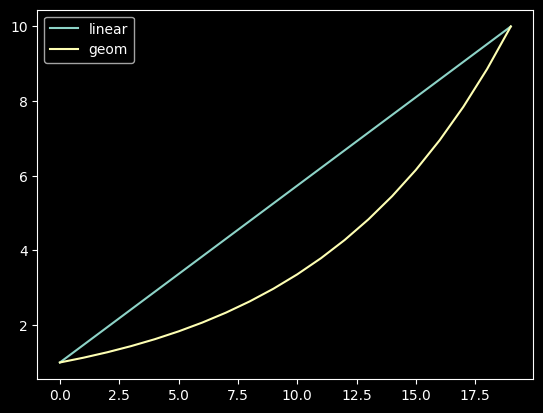

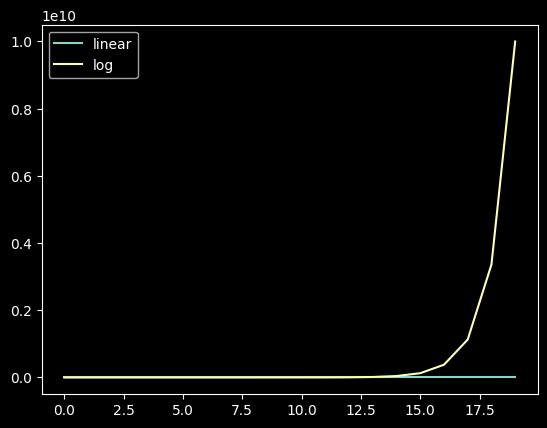

In [42]:
# linspace and logspace in 1D and nD
linear_space = np.linspace(start=1, stop=10, num=20)

# where do you see the difference?
log_space = np.logspace(start=1, stop=10, num=20)

geom_space = np.geomspace(start=1, stop=10, num=20)

plt.plot(linear_space, label='linear')
plt.plot(geom_space, label='geom')
plt.legend()
plt.show()


plt.plot(linear_space, label='linear')
plt.plot(log_space, label='log')
plt.legend()
plt.show()

### Use example of linspace

We have a trace of datapoints with length 240. We know that the sampling rate is 25 kHz. We want to plot the trace with ms on the x-axis and not datapoints. We'll use np.linspace to create an x variable with ms as unit.

number of datapoints = sampling_rate (kHz) x time (ms)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Use example
np.random.seed(101)
trace = np.random.random(240)

sampling_rate  = 25
len_recording = len(trace) / sampling_rate

x = np.linspace(0, len_recording, len(trace))

plt.plot(trace)
plt.xlabel('datapoints')
plt.show()

plt.plot(x, trace)
plt.xlabel('ms')
plt.show()



## Exercise 1 (solved in class):
1. convert the list into a 3D numpy array with dimensions 2, 3, 4

In [ ]:
list1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# your code here

array_ = np.array(list1)
type(array_)

How can you create the same list using only numpy?

In [ ]:
# your code here

np_array = np.arange(24)

array_reshaped = array_.reshape(2,3,4)
array_reshaped.shape

#####
2. You are given a calcium imaging trace. The sampling frequency is 27 Hz. You would like to plot your trace with miliseconds on the x-axis. How do you do that? Remember to do all the conversions.


In [49]:
ca_trace = [0.67227856,  0.79859643,  1.41583187,  0.84323809,  1.76103887,
        1.56558627,  1.24570934,  0.84916793,  1.56814855,  0.30229918,
        0.75400679,  0.42128187, -0.22556617, -0.32676142, -0.02870508,
       -0.60426559,  0.0310078 , -0.26853802, -0.47094859,  0.53295318,
        0.24325534,  0.89471709,  0.90779236,  1.64596382,  1.79012193,
        1.22079864,  1.58240985,  0.87841725,  0.96312475,  0.3620324 ,
        0.09666801, -0.14297638, -0.15123182, -0.7609134 , -0.7312217 ,
       -0.99192088, -0.03332394, -0.2210889 , -0.37067728,  0.67896522,
        0.60519333,  0.41164382,  1.16497306,  1.48716657,  1.77086896,
        1.8323965 ,  1.17876108,  1.73149182,  0.9910903 ,  0.49868767,
        0.47052587, -0.00717205, -0.4484166 ,  0.06015276, -0.03473689,
       -0.15873923, -0.48726942, -0.03681011,  0.33999438, -0.14017489,
        0.50453834,  1.04060066,  1.64048247,  1.56867063,  1.6139952 ,
        1.20012643,  1.20682448,  0.90245025,  0.80165283,  0.9222984 ,
        0.8476965 , -0.39767361, -0.36315739, -0.82232696, -0.10582142,
       -0.2992408 , -0.08067373,  0.18657588, -0.33084715,  0.28171695,
        0.67222834,  0.94403098,  1.4077217 ,  1.70140503,  1.21883168,
        1.09655022,  1.51435907,  0.96457828,  1.29703742,  0.6383136 ,
        0.54942536, -0.08719068, -0.59521882, -0.58742168, -0.82308396,
       -0.75595059, -0.34908398, -0.35498081,  0.28854809,  0.49094478,
        0.92725167,  1.24643092,  1.23647836,  1.14979403,  1.98413962,
        1.09291621,  1.30124236,  0.85330528,  0.94907321,  0.94848113,
        0.30197818, -0.03594916, -0.3892185 , -0.82373065, -0.26678477,
       -0.23221143, -0.26384047,  0.21487527, -0.29464201,  0.07469955,
        1.03654435,  1.14508259,  1.2482088 ,  1.67981277,  1.76942179,
        1.53545631,  1.56077125,  0.92488919,  1.11682069,  0.50974391,
        0.41411688,  0.10306649, -0.13169683, -0.21066604, -0.91785081,
       -0.76551722, -0.5649311 ,  0.30203939,  0.25858509,  0.07950122,
        0.90098013,  1.35241252,  1.6529804 ,  1.12802864,  1.94378743,
        1.20567556,  1.00908443,  1.28291117,  0.42107523,  0.87473845,
       -0.0917925 , -0.43836114,  0.05576018,  0.037141  , -0.23645765,
       -0.15075402,  0.089862  , -0.2262555 , -0.0509875 ,  0.64417727,
        0.8777734 ,  1.22324446,  1.48645312,  1.64697376,  1.2204785 ,
        1.04946945,  1.3389274 ,  1.56799058,  1.08964281,  0.21181736,
       -0.19866036,  0.03159813, -0.1999462 , -0.26321047, -0.7568747 ,
       -0.51295626, -0.13078883, -0.45691991, -0.15308531,  0.40725747,
        0.53084641,  1.4840585 ,  0.98285323,  1.3426583 ,  1.81718985,
        0.99605773,  1.48902548,  0.61704764,  1.25365185,  0.12998423,
       -0.14359921,  0.03110387,  0.04478406, -0.51171472, -0.53458273,
       -0.11667134, -0.30214555, -0.1296693 , -0.01688135,  0.36242167]

Text(0.5, 0, 'ms')

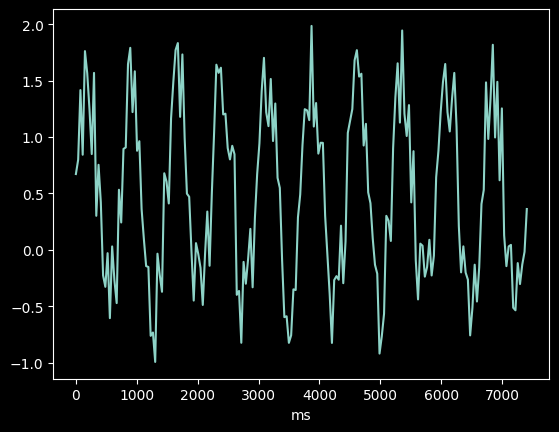

In [50]:
# fast in class solution

sampling_rate = 27
# applying formula
ca_trace = np.array(ca_trace)

t_vec = np.linspace(0, len(ca_trace)/sampling_rate, len(ca_trace)) 

# plotting
plt.plot(t_vec * 1000, ca_trace)
plt.xlabel('ms')

In [51]:
# multi use solution
# create a function 

def plot_trace_time(trace, sampling_rate ,sr_unit):
    '''
    plots a trace over time

    args:
    trace: trace data (numpy array)
    sampling_rate: sampling rate (int)
    sr_unit: sampling rate unit (str)
    '''
    if sr_unit == 'Hz':
        x_label = 'seconds'
    
    if sr_unit == 'kHz':
        x_label = 'ms'

    if sr_unit not in ['Hz', 'kHz']:
       return 'please enter a unit in seconds or miliseconds'
    
    if isinstance(trace, list):
        trace = np.array(trace)

    t_vec = np.linspace(0, len(trace)/sampling_rate, len(trace)) 

    # plotting
    plt.plot(t_vec, trace)
    plt.xlabel(x_label)
    plt.show()

In [52]:
# applying the function
plot_trace_time(trace, 25,'kHz')

plot_trace_time(ca_trace, 27 ,'Hz')

NameError: name 'trace' is not defined

### NEW additional exercise

This is not an ideal funciton. Far from it. There are many cases in which this will not work.
Think of one of them. Try to implement an argument in the function, in other words, change the function so that it takes care of another special case. For example, if the input is in Hz but you want to plot the trace with 'ms' on the x axis.

In [54]:
# your modified function here

def plot_trace_time_modified(trace, sampling_rate):
    '''
    plots a trace over time

    args:
    trace: trace data (numpy array)
    sampling_rate: sampling rate (int)
    sr_unit: sampling rate unit (str)
    '''
   
    x_label = input('seconds or ms')
    sr_unit = input('Hz or kHz')

    if sr_unit not in ['Hz', 'kHz']:
       return 'please enter a unit in seconds or miliseconds'
    
    if isinstance(trace, list):
        trace = np.array(trace)

    t_vec = np.linspace(0, len(trace)/sampling_rate, len(trace))
    if x_label == 'ms' and sr_unit == 'Hz':
        t_vec = t_vec * 1000

    if x_label == 'seconds' and sr_unit == 'Hz':
        t_vec = t_vec / 1000

    # plotting
    plt.plot(t_vec, trace)
    plt.xlabel(x_label)
    plt.show()

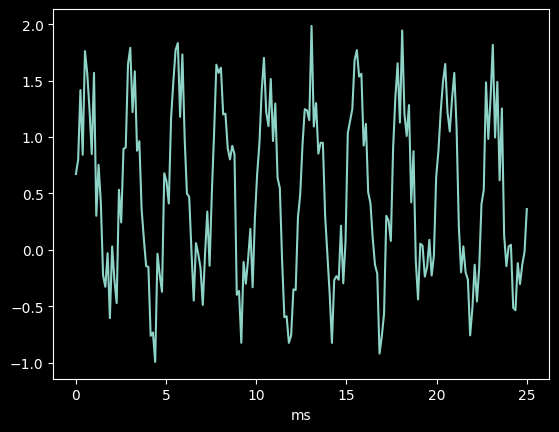

In [55]:
import numpy as np
import matplotlib.pyplot as plt

plot_trace_time_modified(ca_trace, 8)

### Operations with NumPy arrays

- Array operations 
- indexing
- masking

In [26]:
A = np.array([[4, 3], [2, 1]])
B = np.array([[1, 2], [3, 4]])

In [ ]:
# element-wise sum
print('2D numpy array A\n', A)
print('2D numpy array B\n', B)
print('2D numpy array product (element-wise) sum) A+B\n', A+B)

In [ ]:
# 2D numpy array multiplication
print('2D numpy array A\n', A)
print('2D numpy array B\n', B)
print('2D numpy array product (element-wise) multiplication) A*B\n', A*B)

In [ ]:
# dot product

# 2D numpy array multiplication

A = np.array([[4, 3], [2, 1]])
B = np.array([[1, 2], [3, 4]])

print('2D numpy array A\n', A)
print('2D numpy array B\n', B)
print('2D numpy array product (matrix multiplication) A*B\n', np.dot(A,B)) # same as the matrix product

In [ ]:
# transpose

print('2D numpy array A\n', A)
print('A transposed \n', A.T) # same as the matrix product

In [ ]:
# this is called broadcasting
# in the back numpy is basically creating an array with the length of your array
# this allows you to add them by this short command

array1 = np.arange(1,11)
print(array1)

print(array1 + 100)
print(array1 * 100)

In [ ]:
# broadvasting can be used with arrays of any dimensions

array2 = array1.reshape(2,5)

print(array2 + 100)
print(array2 * 100)

### Indexing

In [ ]:
A = np.arange(30)
print(A)

In [ ]:
# indexing single elements
A[23]

In [ ]:
# slicing 
print(A)
# start, end, step
print(A[2:20:3])

In [ ]:
# reshape into a 2D array
A_2D = A.reshape(6,5)
print(A_2D)
# get the diagonal

diag = np.diag(A_2D)
print('the diagonal of A is', diag)

In [ ]:
# transpose and get the diagonal 
A_T = A_2D.T
print(A_T)

diag_T = np.diag(A_T)
print('the diagonal of A is', diag_T)

In [ ]:
# indexing based on (row, column)
print(A_2D)
# 3rd row, 2nd columns
print('The item on 3rd row, 2nd columns is', A_2D[2,1])

# remember we start counting from 0

### Masking

Masking is selecting a set of entries in an array usually based on a condition. You explixidly create a mask or behind the curtains numpy is creating a mask. The mask has the dimensions of the input array and includes boolean (True, False) entries. You can 'index' an array based on the mask. The output are the entries of the array which match the condition. It's clearer with examples.

In [ ]:
# boolean indexing
print(A)

# find where  in A > 13
mask = np.where(A > 13)
print(A[mask])

In [ ]:
# find values in A_2D > 13

print(A_2D)
# find values in A > 13
mask_2D = np.where(A_2D > 13)
print('we are using the following mask', mask_2D)
print(A_2D[mask_2D])

In [ ]:
A_3D = A.reshape(3,2,5)

mask_3D = np.where(A_3D > 13)
print('we are using the following mask', mask_3D)
print('the mask has a shape', np.shape(mask_3D))
print(A_3D[mask_3D])

In [ ]:
# finding non zero elements

mask_non_0 = np.nonzero(A_3D)
A_3D[mask_non_0]

### Copy and fake copy

It's kind of an advanced topic but it's extremely important and understanding the consequence of this could save you lots of time. Remember that if you want to create an array that is slightly different than another array, and you'd like to keep the original array, make a copy.

Here is an example.

In [2]:
original_array = np.arange(10)
print(original_array)

NameError: name 'np' is not defined

In [ ]:
# assign a fake copy. just by making an array equal to the original one
fake_copy = original_array

# change the 3rd value of the fake copy to 1000
fake_copy[2] = 1000

# okey, it wokred
print(fake_copy)

# but why is also my original array changed?
print(original_array)

In [ ]:
# then changing the shape would also change my originla array
# two birds with one stone, right?

fake_copy2 = original_array.reshape(2,5)

# okey, it wokred
print(fake_copy2.shape)

# but why is now my original array not changed?
print(original_array.shape)

In [ ]:
# to avoid this 'random' behaviour, make sure you always create a copy
# when you want to keep the original array and the new array separate

original_array = np.arange(10)
print(original_array)

# createa true copy
true_copy = original_array.copy()

# change the 3rd value of the fake copy to 1000
true_copy[2] = 1000

# okey, it wokred
print(true_copy)

# now the original copy is not changed
print(original_array)

## Homework exercise

In this exercise, we'll work again with the charaterization dictionary from last time. This time we'd avoid using for loops at all cost. Your best friend is the numpy documentation page. Link in the first cell of this notebook.

!!! IMPORTNT. Download the detect_peaks.py script from GitHub. Make sure it's located in the same folder as this homework file.

Tasks:
- Find the resting potential for each sweep
- Find the firing sweeps for each day
- Find the number of action potentials for each day in each sweep

##### Setup

In [56]:
import json
import matplotlib.pyplot as plt
import numpy as np

# detect_peaks.py needs to be located in the same folder as this notebook in oredr for the import to work
from detect_peaks import detect_peaks

In [57]:
# Run this cell, required so that you are able to load the data. no need to understand them for now

# Custom JSON decoder to handle lists and convert them back to NumPy arrays
def json_numpy_obj_hook(dct):
    '''
    Decodes a JSON object and converts lists back to NumPy arrays.

    Args:
        dct (dict): The JSON object.

    Returns:
        dict: The decoded JSON object with lists converted to NumPy arrays.
    '''
    for key, value in dct.items():
        if isinstance(value, list):
            try:
                dct[key] = np.array(value)
            except ValueError:
                pass
    return dct

# Function to read a JSON file and convert lists back to NumPy arrays
def read_dict_from_text_file(file_path: str):
    '''
    Reads a JSON file and converts lists back to NumPy arrays.

    Args:
        file_path (str): The path to the input JSON file.

    Returns:
        dict: The dictionary with lists converted to NumPy arrays.
    '''
    with open(file_path, 'r') as file:
        dictionary = json.load(file, object_hook=json_numpy_obj_hook)
    return dictionary

# plotting the all the sweeps. No need to understand this function

def plot_all_sweeps(charact_dict):
    '''
    Plots all sweeps for two recordings (D1 and D2) from a given characteristic dictionary.
    Arguments:
    charact_dict (dict): A dictionary containing two keys 'D1' and 'D2', each associated with a 2D numpy array.
                         The arrays should have sweeps as rows and data points as columns.
    The function creates a figure with two subplots:
    - left subplot shows the sweeps for 'D1', right subplot shows the sweeps for 'D2'
    '''
    
    sampling_rate = 20 # in kHz
    all_swps = np.shape(charact_dict['D1'])[0]
    swp_len_ms = np.shape(charact_dict['D1'])[1] / sampling_rate
    x = np.linspace(0, swp_len_ms, len(charact_dict['D1'][0,:]))
    fig, ax = plt.subplots(1, 2, figsize = (12,5))

    for i in range(all_swps):
        ax[0].plot(x, charact_dict['D1'][i,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[i])
        ax[1].plot(x, charact_dict['D2'][i,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[i])

    ax[0].set_title('Recording D1')
    ax[0].set_xlabel('ms')
    ax[0].set_ylabel('mV')

    ax[1].set_title('Recording D2')
    ax[1].set_xlabel('ms')
    ax[1].set_ylabel('mV')
    plt.show()

def plot_specific_swp_num(charact_dict, swp_num1, swp_num2,
                           inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]):
    '''
    Plots a sweep from day 1 and day 2.

    Arguments:
    charact_dict (dict): Dictionary with cell characterization data from 2 days.
                         Should contain keys 'D1' and 'D2' with corresponding data.
    swp_num1 (int): Sweep number, ranging from 0 to 11, from day 1 to plot
    swp_num2 (int): Sweep number, ranging from 0 to 11, from day 2 to plot.
    inj (list, optional): List of current steps in pA. Default is 
                          [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300].

    Returns:
    None
    '''

    if not isinstance(swp_num1, int) or not isinstance(swp_num2, int) or \
        not isinstance(charact_dict, dict):
        return 'Not possible. Are you trying to break me?'

    if swp_num1 > 11 or swp_num2 > 11:
        return 'Not possible. Only 12 sweep available'
    
    sampling_rate = 20 # in kHz
    all_swps = np.shape(charact_dict['D1'])[0]
    swp_len_ms = np.shape(charact_dict['D1'])[1] / sampling_rate
    x = np.linspace(0, swp_len_ms, len(charact_dict['D1'][0,:]))
    fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12,5))

    ax[0].plot(x, charact_dict['D1'][swp_num1,:], color = plt.cm.Oranges(np.linspace(1, 0.25, all_swps))[swp_num1])
    ax[1].plot(x, charact_dict['D2'][swp_num2,:], color = plt.cm.Greens(np.linspace(1, 0.25, all_swps))[swp_num2])

    ax[0].set_title('Sweep number '+ str(swp_num1) +' from D1\n'\
                    'current step of ' + str(inj[swp_num1]) + ' pA')
    ax[0].set_xlabel('ms')
    ax[0].set_ylabel('mV')

    ax[1].set_title('Sweep number '+ str(swp_num2) +' from D2\n'\
                    'current step of ' + str(inj[swp_num2]) + ' pA')
    ax[1].set_xlabel('ms')
    ax[1].set_ylabel('mV')
    ax[1].yaxis.set_tick_params(labelleft=True)

    plt.show()

In [58]:
# change the file path to where your charact_dict is located

file_path = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/schmitzlab_python/data/charact_data.json'

# load your characterization dictionary
charact_dict = read_dict_from_text_file(file_path)

In [59]:
list(charact_dict.keys())

['D1', 'D2']

##### Find the mean resting potential for each sweep

Store the values in a dictionary with keys D1 and D2. Practicing indexing and summary statistic functions.

Remember there are injected currents. So, we'd need to index the array and 'isoalte' the place where there is no current injected. Let's first plot it and chose the values between which we'd calculate the resting potential.

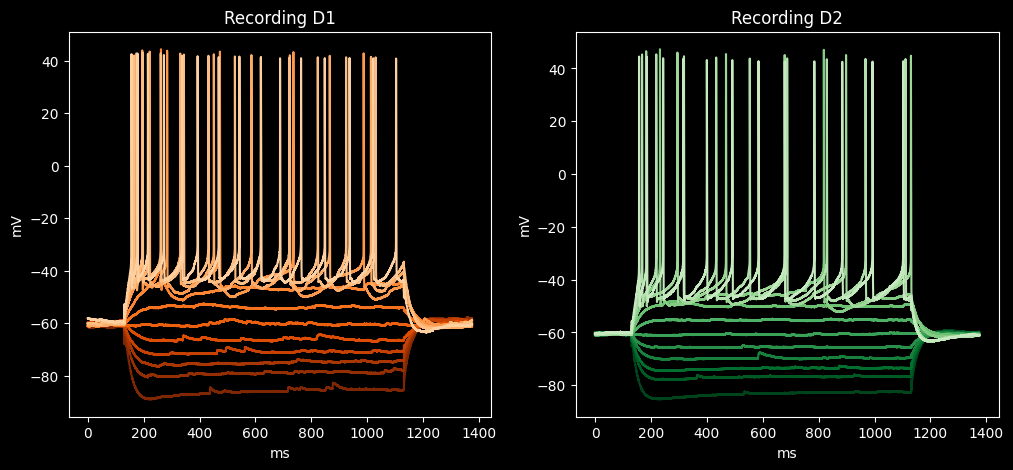

In [60]:
# plot all sweeps

plot_all_sweeps(charact_dict)

In [64]:
charact_dict['D1'].shape

(12, 27500)

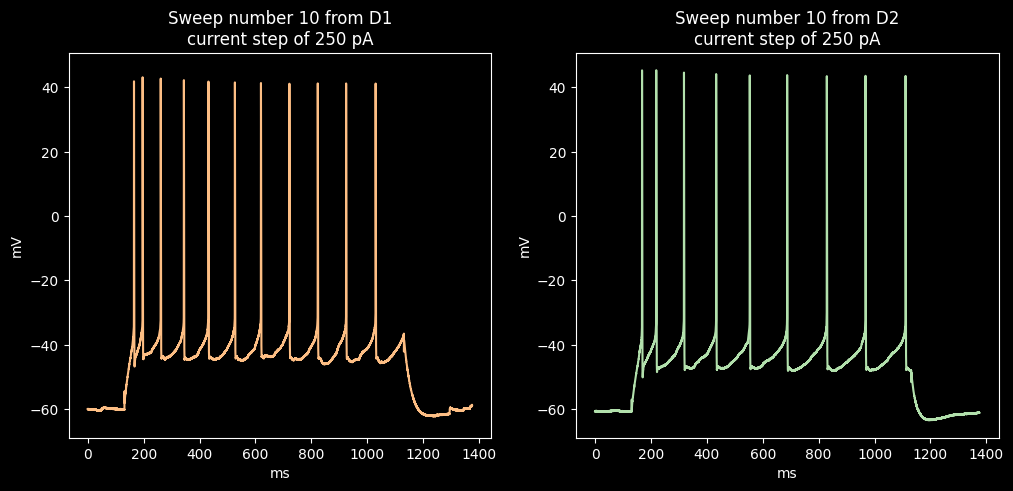

In [61]:
# plot specific_swp_num
# this can help you check if your solutions are correct

plot_specific_swp_num(charact_dict, 10, 10)

Looking at those plots. Where could we measure the resting potential in each sweep. In other words, what is the part of the data where no currernt seems to be injected?

Rememer on the plots there are ms on the x axis. You'd need to transform to an array to be able to index the data.

Hint. There are two possibilities. before and after the APs. <br>
What is a reason to focus on the time period before?

In [ ]:
# Apply the formula to transform ms to dp. To find the cutoff. aka any meaningful datapoint before the start (offset) of the injection
dp = 100 * 20

# index the array so that for each sweep, you only have the chosen number of data points
mean_array_d1 = np.mean(charact_dict['D1'][:, 0:dp], axis = 1)
mean_array_d2 = np.mean(charact_dict['D2'][:, 0:dp], axis = 1)

# create the output dictionary
RMP_dict = {
    'D1': mean_array_d1,
    'D2': mean_array_d2
}

In [63]:
# apply np.mean to find the mean resting membrane potential for each day
# Hint: you are sked to average over the means you've already acquired)

print('the mean for D1', np.mean(RMP_dict['D1']), 'mV')
print('the mean for D2', np.mean(RMP_dict['D2']), 'mV')

# can you do this directly, in one line, using only charact_dict['D1]

print('the mean for D1', np.mean(charact_dict['D1'][:, 0:dp]), 'mV')
print('the mean for D1', np.mean(charact_dict['D2'][:, 0:dp]), 'mV')


the mean for D1 -60.14735641479493 mV
the mean for D2 -60.55713780721029 mV
the mean for D1 -60.14735641479492 mV
the mean for D1 -60.55713780721029 mV


##### Find the firing sweeps for each day

Store the values in a dictionary with keys D1 and D2. Practicing indexing, looking for specific numpy functions.

For each day find the sweeps in which there are fired action potentials. Don't use for loops. Only NumPy.

In [ ]:
# define a cut off threshold
th = 0

# find sweeps where the values are above this threshold
# here many ways possible. Try to think of more than 1
firing_sweeps_D1 = charact_dict['D1'][np.any(charact_dict['D1'] > th, axis=1)]
firing_sweeps_D2 = charact_dict['D2'][np.any(charact_dict['D2'] > th, axis=1)]

# another way 
firing_sweeps_D1_m = charact_dict['D1'][np.max(charact_dict['D1'] > th, axis=1)]
firing_sweeps_D2_m = charact_dict['D2'][np.max(charact_dict['D2'] > th, axis=1)]

# is there a difference in the time it takes to compute?

# not really

# define the output dictionary

firing_sweeps = {
    'D1': firing_sweeps_D1,
    'D2': firing_sweeps_D2
}

In [71]:
%%timeit
charact_dict['D1'][np.max(charact_dict['D1'] > th, axis=1)]

160 μs ± 3.53 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [72]:
%%timeit
charact_dict['D1'][np.any(charact_dict['D1'] > th, axis=1)]
# charact_dict['D2'][np.any(charact_dict['D1'] > th, axis=1)]

159 μs ± 1.85 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


##### Find the number of action potentials for each day in each sweep

Store the result in an array with dimensionts (2, 12, 3). 2 for the two days, 12 for the sweeps, 3 for the measurements (swp number, injected curent, number of fired APs)

Practicing understanding foreign code, indexing, filling of arrays.

Here we are using a pre-defined function called detect_peaks that finds peaks. We'd have to work around the fact that it can only take 1D arays as input.

the function detect_peaks returns an array with indices of the peaks. Then how can we get the number of peaks? What information does the length of this array give us?

In [27]:
# what does this give us?

num_sweeps = charact_dict['D1'].shape[0]

# what about that one?
num_datapoints = charact_dict['D1'].shape[1]

# create varaibles that you'd use

In [ ]:
inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]

num_swps = charact_dict['D1'].shape[0]

# define a numpy array that you'd fill with info in the following for loops
params = np.zeros(2 * num_swps * 3).reshape(2, num_swps, 3)

for i, day in enumerate(charact_dict.keys()):

    # unfortunately this for loop is needed because detect peaks takes only 1D arrays as input

    for j in range(num_swps): #loop through sweeps
        # index the data to access the data for each sweep
        swp_data = charact_dict[day][j]
        pks = detect_peaks(swp_data, mph = 20, mpd = 50) # detects peaks
        
        # fill the data in your params varaible
        params[i, j] = [j, inj[j], len(pks)]

In [30]:
inj = [-300, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300]
sampl_rate = 20 

def get_firing_sweeps(char_dict, inj_in):
    '''
    returns a numpy array with dimensions (2, num_sweeps, 3)

    arguments:
    characterization dictionary
    inj - list of injected currents
    '''

    num_swps_d1 = char_dict['D1'].shape[0]
    num_swps_d2 = char_dict['D2'].shape[0]

    if num_swps_d1 != num_swps_d2 or len(inj) != num_swps_d1:
        inj_d1 = inj_in[-num_swps_d1:]
        inj_d2 = inj_in[-num_swps_d1:]

    # define a numpy array that you'd fill with info in the following for loops
    if num_swps_d1 > num_swps_d2:
        params = np.zeros(2 * num_swps_d1 * 3).reshape(2, num_swps_d1, 3)
    else:
        params = np.zeros(2 * num_swps_d2 * 3).reshape(2, num_swps_d2, 3)

    for i, day in enumerate(char_dict.keys()):

        if i == 0:
            inj = inj_d1
        else:
            inj = inj_d2
        # unfortunately this for loop is needed because detect peaks takes only 1D arrays as input

        for j in range(char_dict[day].shape[0]): #loop through sweeps
            # index the data to access the data for each sweep
            swp_data = char_dict[day][j]
            pks = detect_peaks(swp_data, mph = 20, mpd = 50) # detects peaks
            
            swp_num = len(inj_in) + j - char_dict[day].shape[0]
            # fill the data in your params varaible
            params[i, j] = [swp_num, inj[j], len(pks)]
    return params

In [31]:
get_firing_sweeps(firing_sweeps, inj)

array([[[  7., 100.,   1.],
        [  8., 150.,   5.],
        [  9., 200.,   8.],
        [ 10., 250.,  11.],
        [ 11., 300.,  15.]],

       [[  8., 100.,   2.],
        [  9., 150.,   6.],
        [ 10., 200.,   9.],
        [ 11., 250.,  12.],
        [  0.,   0.,   0.]]])

In [32]:
inj2 =  [100, 150, 200, 250, 300]
get_firing_sweeps(firing_sweeps, inj2)

array([[[  0., 100.,   1.],
        [  1., 150.,   5.],
        [  2., 200.,   8.],
        [  3., 250.,  11.],
        [  4., 300.,  15.]],

       [[  1., 100.,   2.],
        [  2., 150.,   6.],
        [  3., 200.,   9.],
        [  4., 250.,  12.],
        [  0.,   0.,   0.]]])

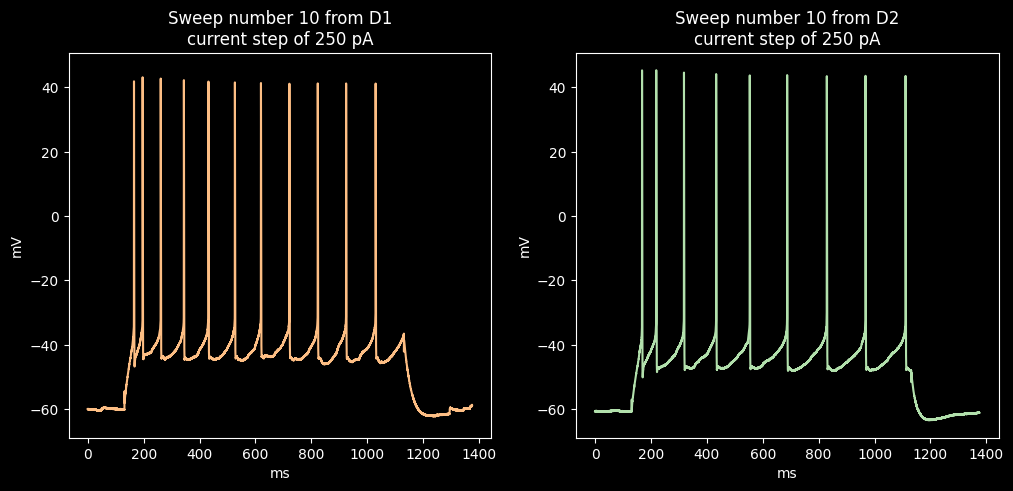

In [33]:
plot_specific_swp_num(charact_dict, 10, 10)